In [1]:
import _init_paths
import numpy as np
import matplotlib.pyplot as plt
import nengo, nengo_loihi
import tensorflow as tf

NUM_IMGS = 36

In [2]:
def get_isi(array):
  t = 0
  isi_lst = []
  for i, k in enumerate(array):
    if k!=0 and t==0:
      t = i
    elif k!=0: 
      isi_lst.append(i-t)
      t = i

  return isi_lst

In [3]:
def get_isi_dist_of_all_images(conv_mats_list):
  dikt = {}
  for i, mat in enumerate(conv_mats_list[:NUM_IMGS]):
    neurons_isi = []
    for neuron in range(mat.shape[1]):
      isi_lst = get_isi(mat[:, neuron])
      if isi_lst:
        neurons_isi.append(int(np.round(np.mean(isi_lst))))
    dikt[i] = neurons_isi
  return dikt

In [4]:
def plot_multigrid_figures(dikt, num_bins, img_name):
  fig, axs = plt.subplots(NUM_IMGS//4, 4, figsize=(14, NUM_IMGS//2))
  for i in range(NUM_IMGS):
    row, col = i//4, i%4
    axs[row, col].set_title("Test Image Index: %s" % i)
    axs[row, col].hist(dikt[i], bins=num_bins)
    
  for ax in axs.flat:
    ax.set(xlabel='ISI', ylabel='Frequency')
  for ax in axs.flat:
    ax.label_outer()

  fig.tight_layout()
  plt.savefig(img_name, dpi=450, bbox_inches = "tight")

In [5]:
def get_dataset_isi_otpt(model, dataset):
  ret = np.load("/home/rgaurav/projects/def-anarayan/rgaurav/spiking_investigation/experiment_outputs/"
                 "%s/%s/ndl_train_test_results/ndl_test_only_results/layer_probes_otpt.npy" % (dataset, model),
                allow_pickle=True)
  return ret.item()

In [6]:
def plot_isi_dist(conv_otpt, num_bins, img_name):
  dikt = get_isi_dist_of_all_images(conv_otpt)
  plot_multigrid_figures(dikt, num_bins=num_bins, img_name=img_name)

# #################################################################

# MODEL 1: CIFAR10

In [7]:
m1_cifar10 =get_dataset_isi_otpt("model_1", "cifar10")
print(m1_cifar10.keys())

dict_keys(['conv2d_1.0'])


## First Conv Layer

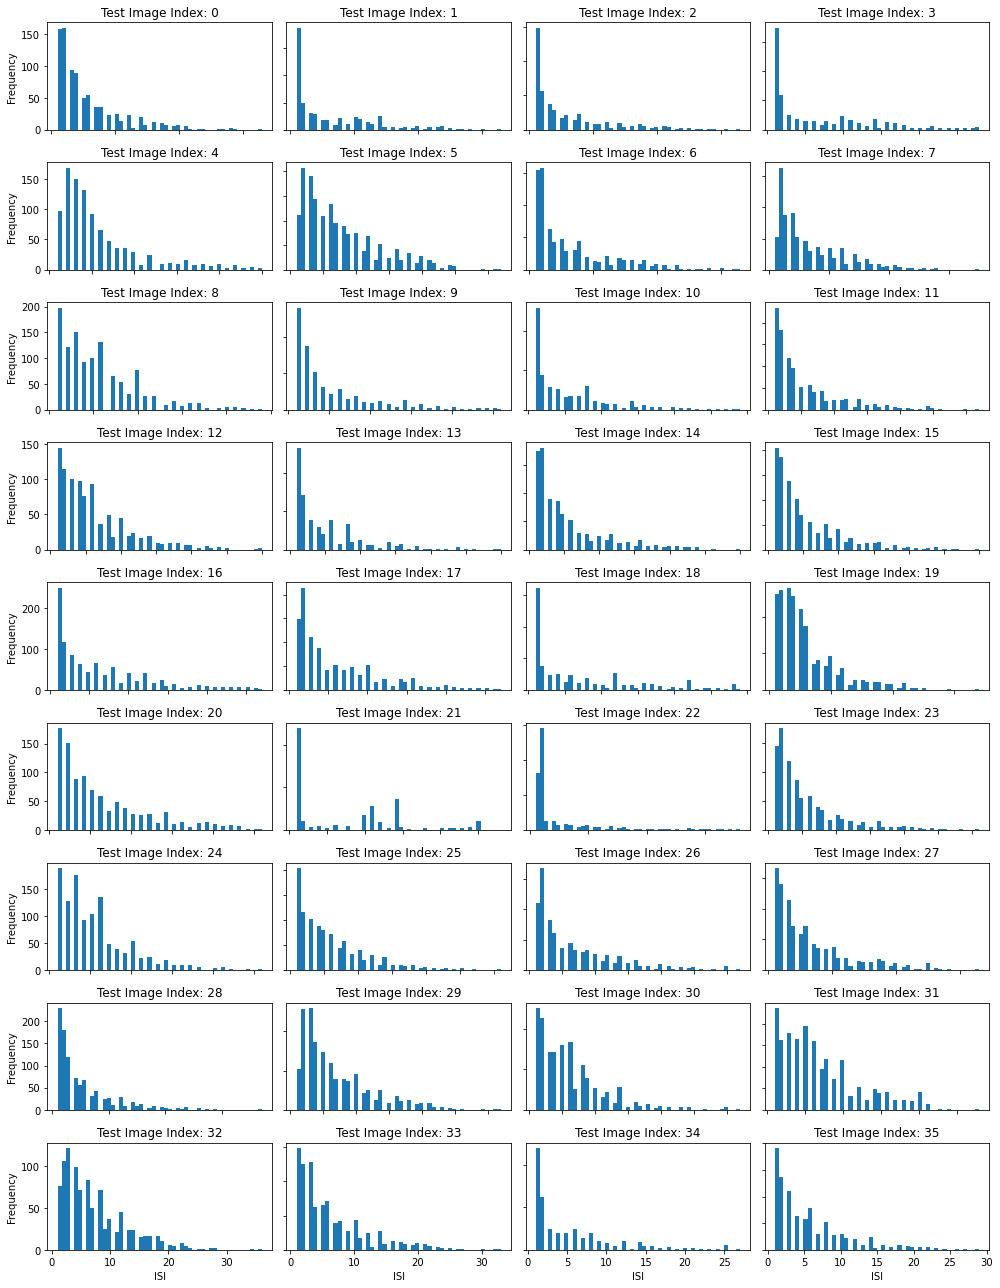

In [8]:
plot_isi_dist(m1_cifar10["conv2d_1.0"], 50, "M1_C10_Conv1")

# MODEL 1: FMNIST

In [9]:
m1_fmnist = get_dataset_isi_otpt("model_1", "fashion_mnist")
print(m1_fmnist.keys())

dict_keys(['conv2d_1.0'])


## First Conv Layer

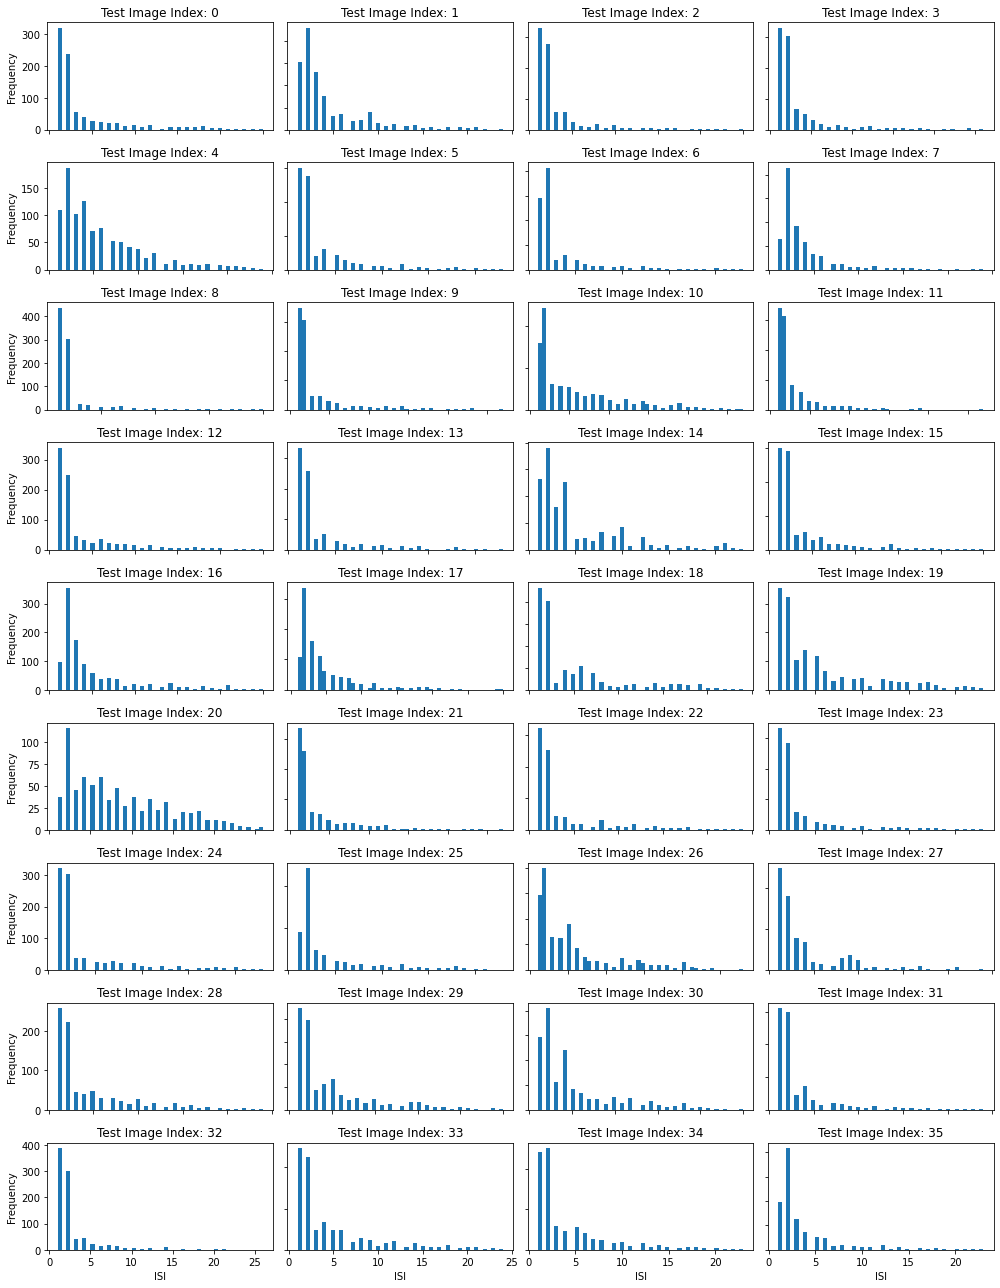

In [10]:
plot_isi_dist(m1_fmnist["conv2d_1.0"], 50, "M1_FMN_Conv1")

# MODEL 1: MNIST

In [11]:
m1_mnist = get_dataset_isi_otpt("model_1", "mnist")
print(m1_mnist.keys())

dict_keys(['conv2d_1.0'])


## First Conv Layer

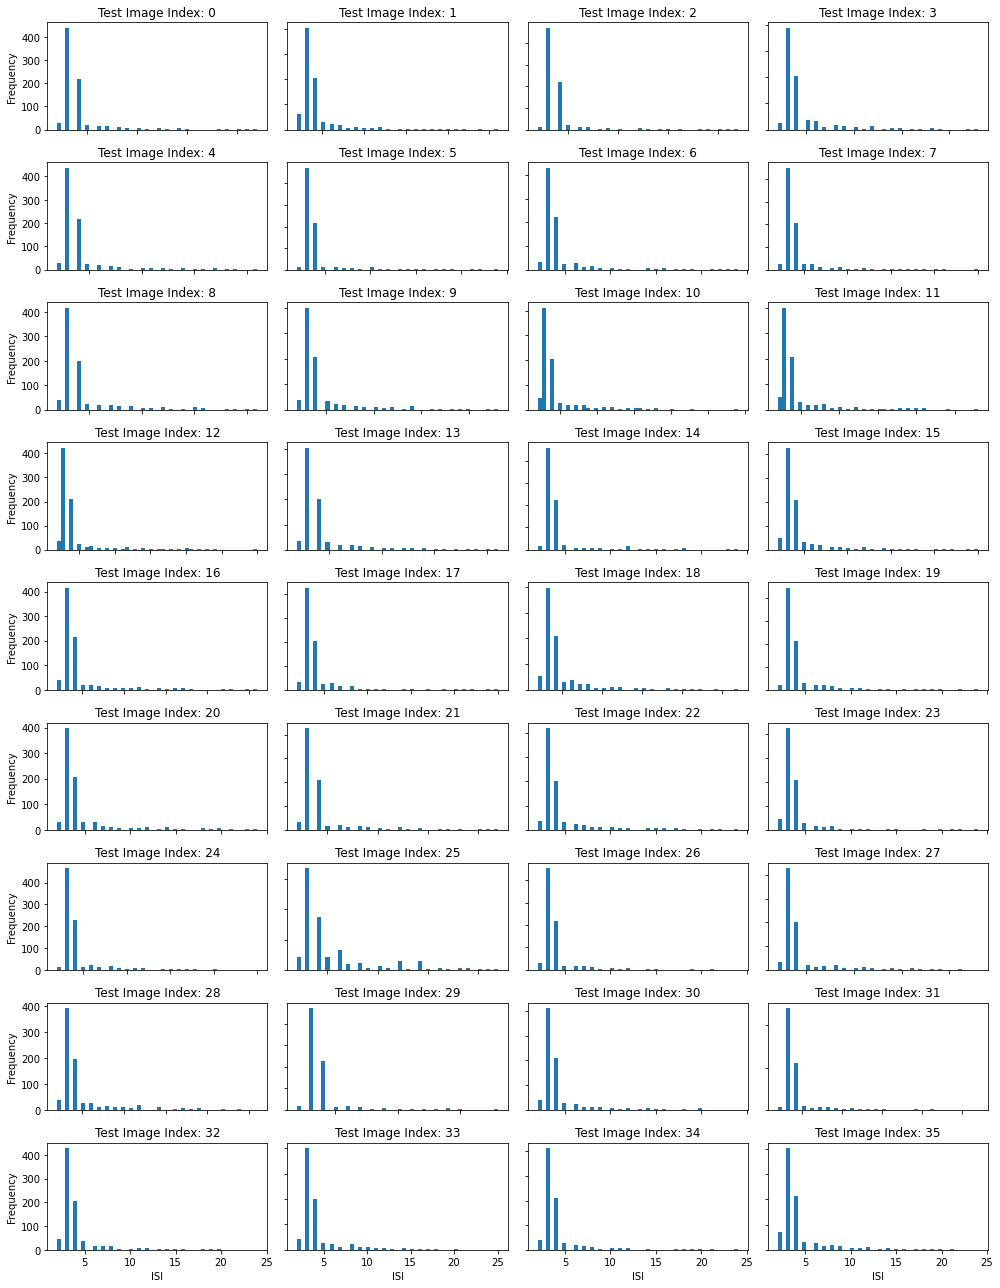

In [12]:
plot_isi_dist(m1_mnist["conv2d_1.0"], 50, "M1_MN_Conv1")

# MODEL 2:  CIFAR10 

In [13]:
m2_cifar10 =get_dataset_isi_otpt("model_2", "cifar10")
print(m2_cifar10.keys())

dict_keys(['conv2d_1.0', 'conv2d_2.0'])


## First Conv Layer

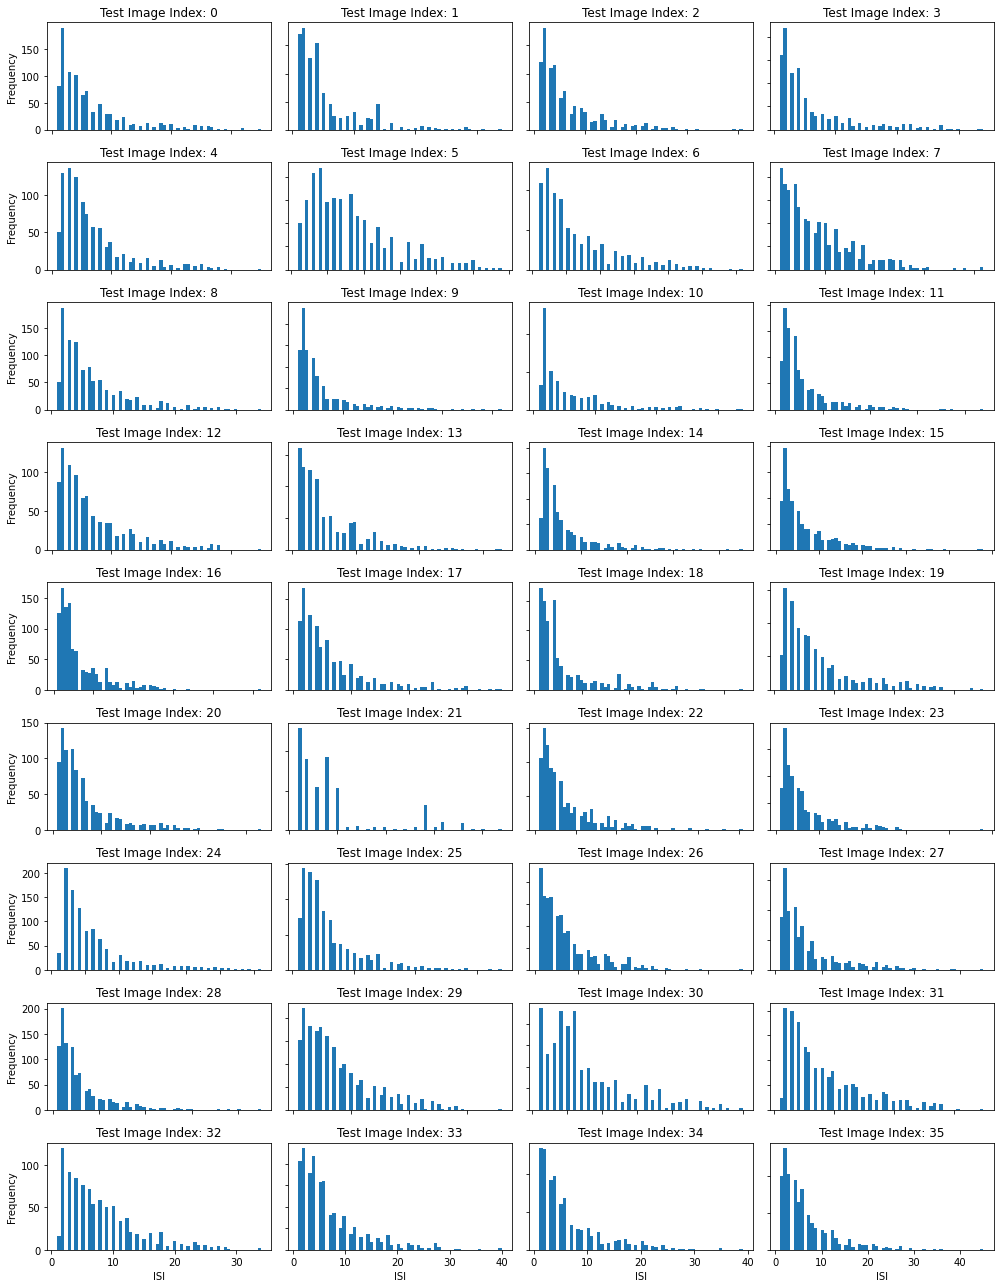

In [14]:
plot_isi_dist(m2_cifar10["conv2d_1.0"], 60, "M2_C10_Conv1")

## Second Conv Layer

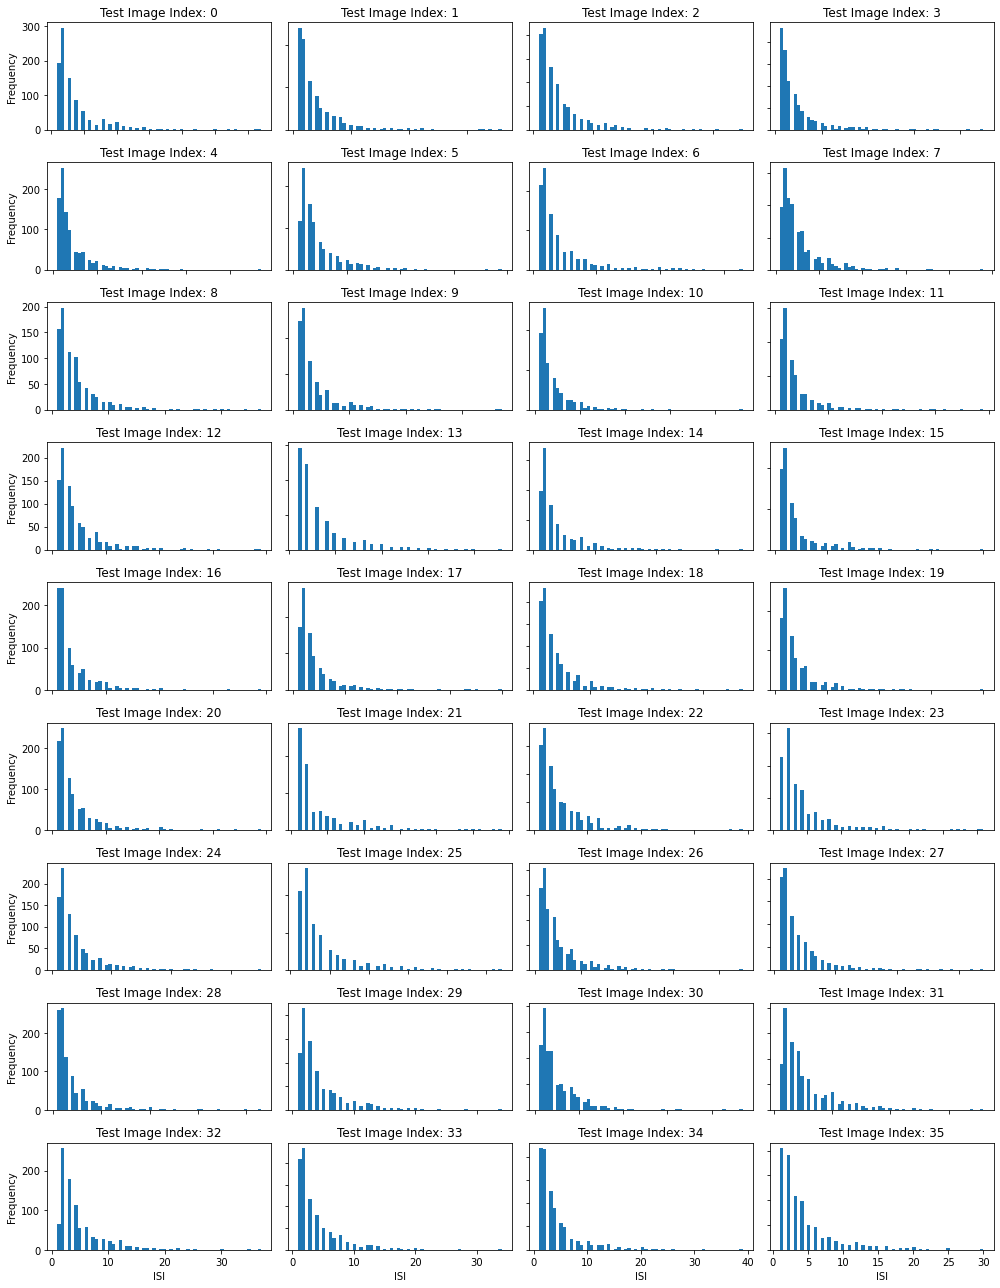

In [15]:
plot_isi_dist(m2_cifar10["conv2d_2.0"], 60, "M2_C10_Conv2")

# MODEL 2: MNIST

In [16]:
m2_mnist = get_dataset_isi_otpt("model_2", "mnist")
print(m2_mnist.keys())

dict_keys(['conv2d_1.0', 'conv2d_2.0'])


## First Conv Layer

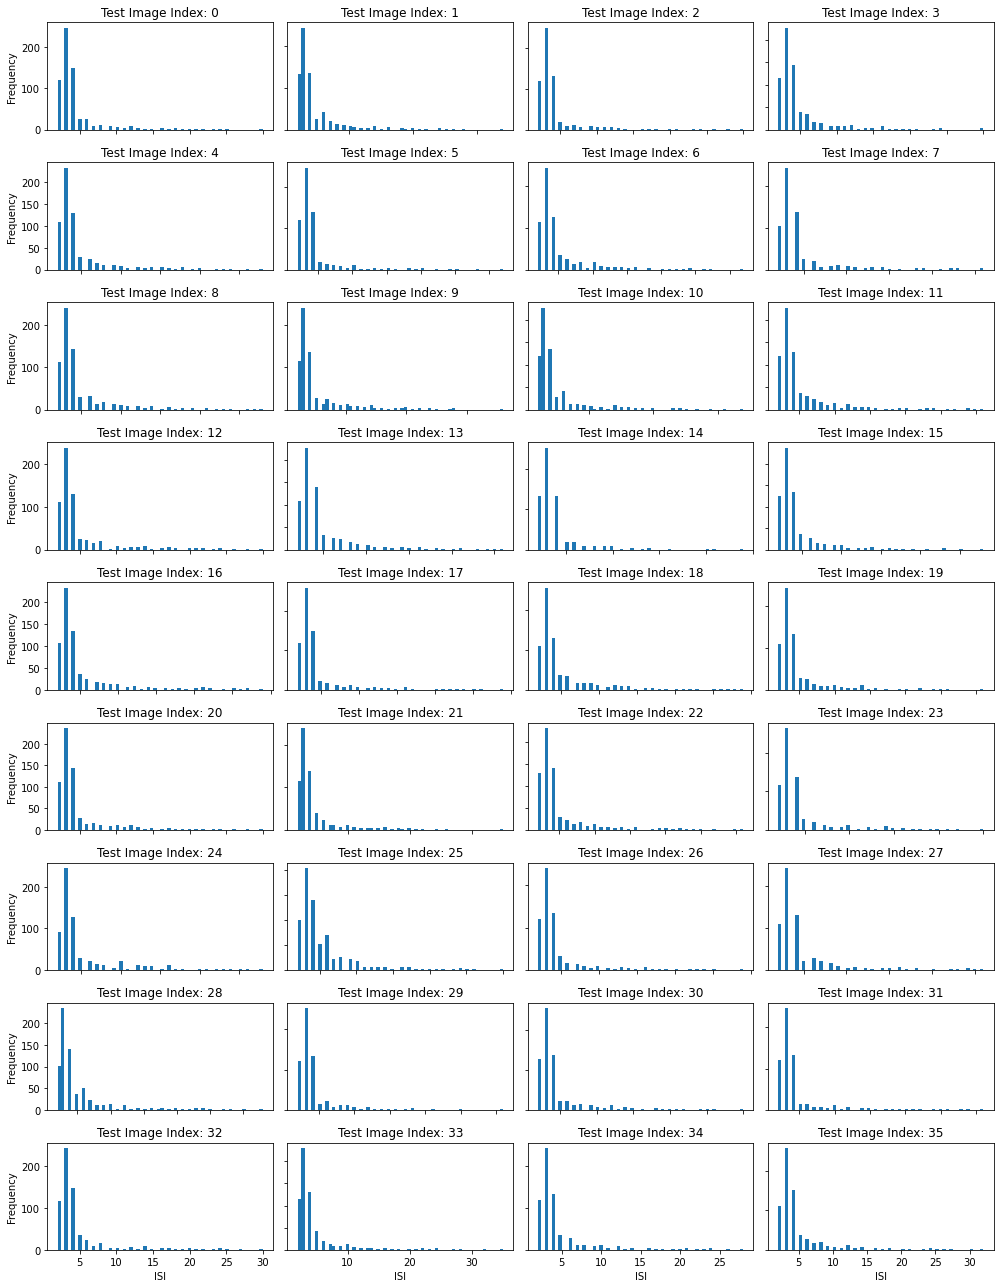

In [18]:
plot_isi_dist(m2_mnist["conv2d_1.0"], 60, "M2_MN_Conv1")

## Second Conv Layer

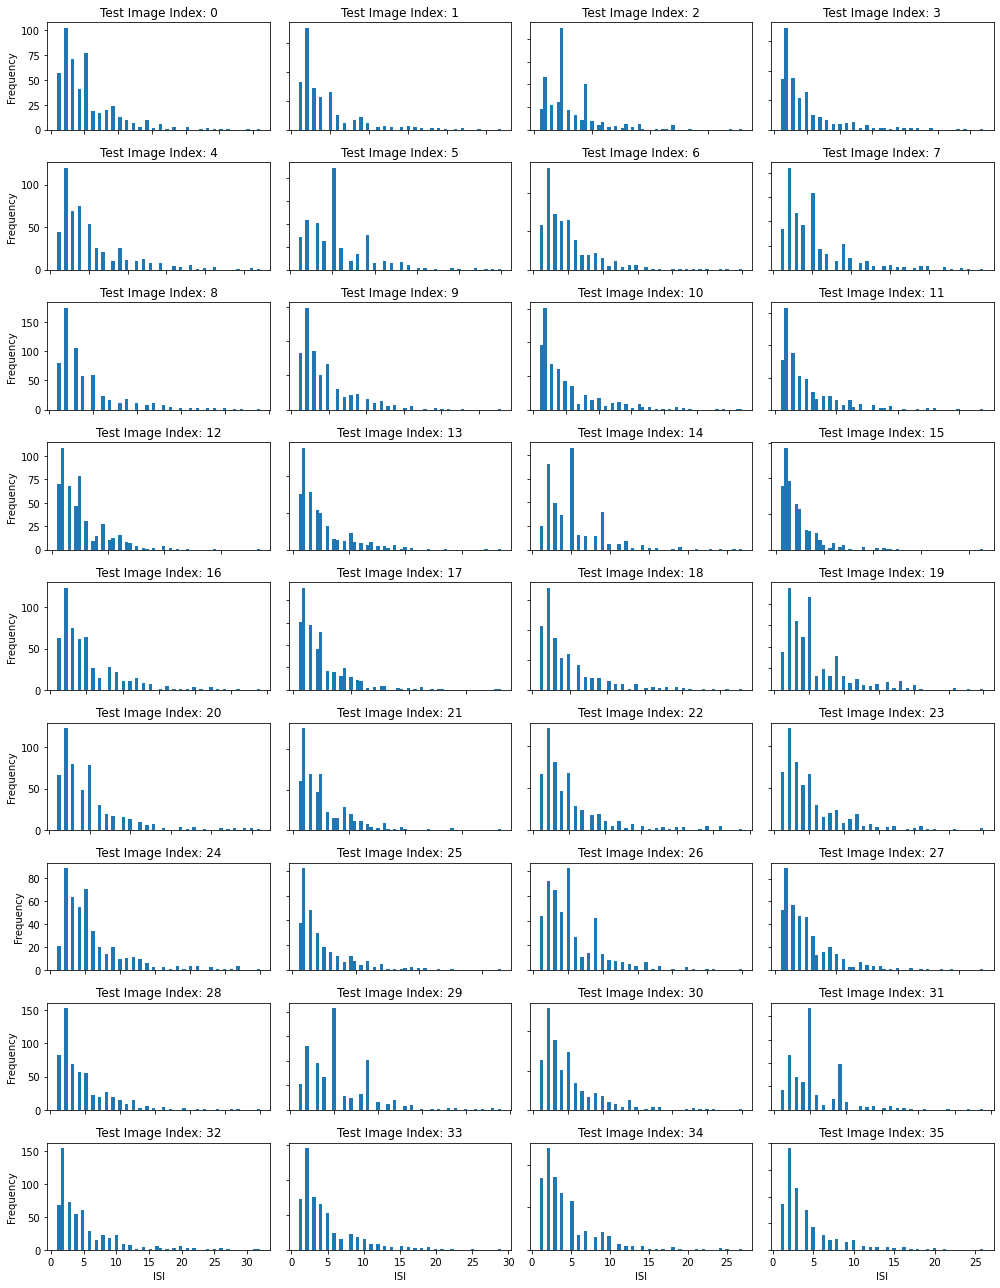

In [19]:
plot_isi_dist(m2_mnist["conv2d_2.0"], 60, "M2_MN_Conv2")

# MODEL 2: FMNIST

In [20]:
m2_fmnist = get_dataset_isi_otpt("model_2", "fashion_mnist")
print(m2_fmnist.keys())

dict_keys(['conv2d_1.0', 'conv2d_2.0'])


## First Conv Layer

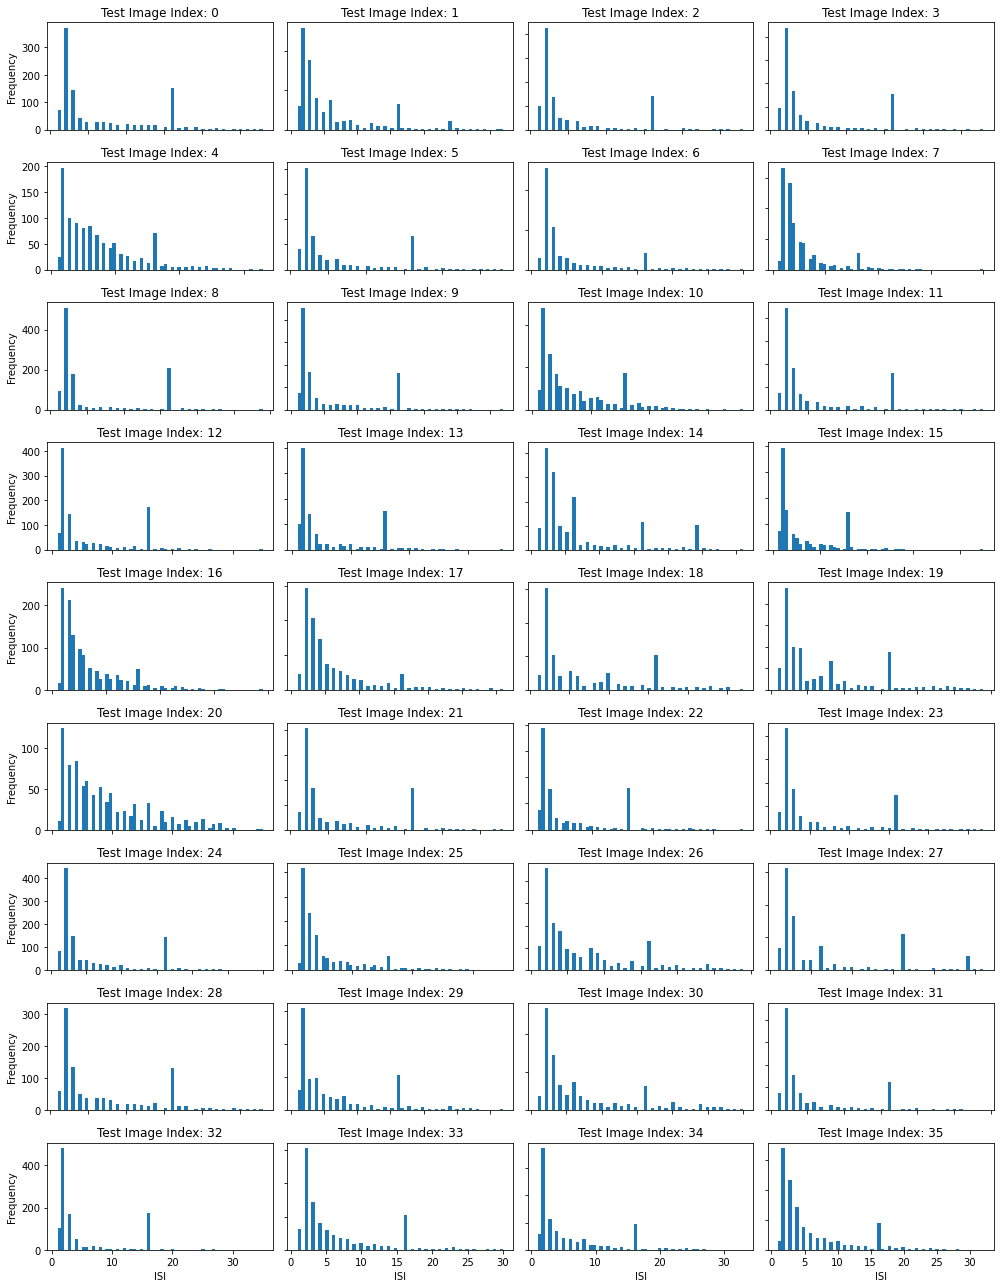

In [21]:
plot_isi_dist(m2_fmnist["conv2d_1.0"], 60, "M2_FMN_Conv1")

## Second Conv Layer

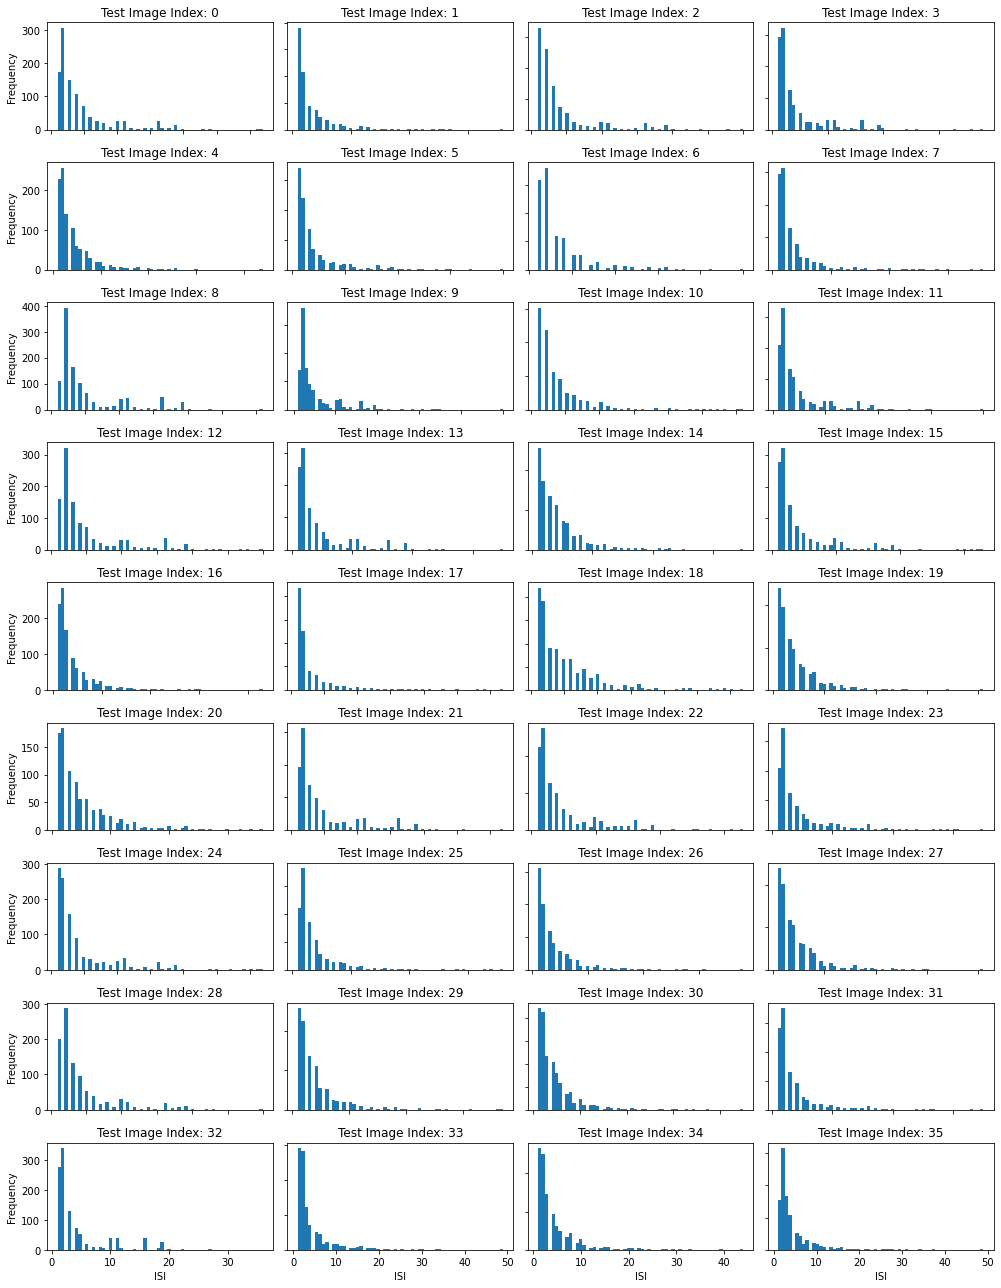

In [22]:
plot_isi_dist(m2_fmnist["conv2d_2.0"], 60, "M2_FMN_Conv2")